In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import numpy as np

In [44]:
df=pd.read_csv(r'C:\Users\venka\OneDrive\Documents\AIDS_TekWorks\train.csv')

In [46]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Load the dataset and study applicant attributes such as:
  - Applicant income
  - Loan amount
  - Credit history
  - Employment status
- Identify features that may influence loan approval.
 

In [57]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [59]:
for col in df.select_dtypes(include='object').columns:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
 

In [63]:
x=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=df.Loan_Status
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

- Build three different SVM models using:
  - Linear kernel
  - Polynomial kernel
  - RBF kernel
- Train each model and evaluate performance using:
  - Accuracy
 - Precision / Recall
- Compare results and identify:
  - Which kernel handles non-linear patterns better
  - Which kernel generalizes best on unseen data

In [65]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
from sklearn.svm import SVC
# SVM with linear kernel
svm_linear=SVC(kernel='linear',C=1)
svm_linear.fit(x_train,y_train)
y_pred_linear=svm_linear.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuarcy for Linear:",accuracy_score(y_test,y_pred_linear))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_linear))

Accuarcy for Linear: 0.7886178861788617
confusion matrix:
 [[18 25]
 [ 1 79]]


In [69]:
# SVM with Polynomial kernel
svm_poly=SVC(kernel='linear',C=1,degree=3)
svm_poly.fit(x_train,y_train)
y_pred_poly=svm_poly.predict(x_test)

print("Accuarcy for poly:",accuracy_score(y_test,y_pred_poly))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_poly))

Accuarcy for poly: 0.7886178861788617
confusion matrix:
 [[18 25]
 [ 1 79]]


In [76]:
# SVM with RBF kernel
svm_rbf=SVC(kernel='rbf',C=1,degree=3)
svm_rbf.fit(x_train,y_train)
y_pred_rbf=svm_rbf.predict(x_test)
cm=confusion_matrix(y_test,y_pred_rbf)
print("Accuarcy for poly:",accuracy_score(y_test,y_pred_rbf))
print("confusion matrix:\n",cm)

Accuarcy for poly: 0.7886178861788617
confusion matrix:
 [[18 25]
 [ 1 79]]


In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

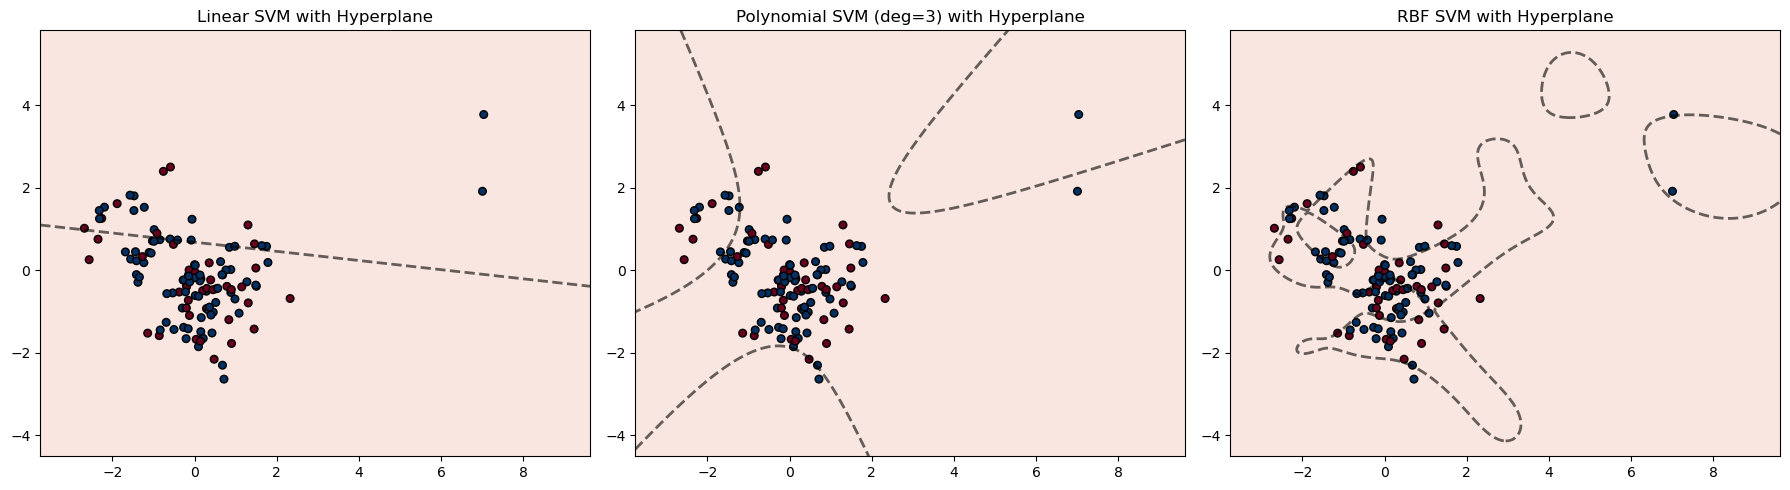

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# --- PCA TO 2D ---
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(x_train)
X_test_2d = pca.transform(x_test)

# --- TRAIN MODELS ON 2D DATA ---
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_2d, y_train)

svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train_2d, y_train)

svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_2d, y_train)

# --- PLOTTING FUNCTION ---
def plot_decision_boundary(model, ax, title):
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 500),
        np.linspace(y_min, y_max, 500)
    )

    # Plot decision regions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.RdBu) # Using a diverging colormap

    # Plot the hyperplane and margins
    if hasattr(model, "decision_function"):
        Z_df = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z_df = Z_df.reshape(xx.shape)
        # Plot decision boundary (hyperplane) at Z_df = 0
        # Plot margins at Z_df = -1 and Z_df = 1
        ax.contour(xx, yy, Z_df, colors='k', levels=[-1, 0, 1], alpha=0.6,
                   linestyles=['--', '-', '--'], linewidths=2)
    else:
        # Fallback for models without decision_function, plot the 0.5 contour of predictions
        ax.contour(xx, yy, Z, colors='k', levels=[0.5], linestyles=['-'], linewidths=2)

    ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, s=30, edgecolor='k', cmap=plt.cm.RdBu) # Match cmap
    ax.set_title(title)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# --- SIDE BY SIDE PLOT ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_decision_boundary(svm_linear, axes[0], "Linear SVM with Hyperplane")
plot_decision_boundary(svm_poly, axes[1], "Polynomial SVM (deg=3) with Hyperplane")
plot_decision_boundary(svm_rbf, axes[2], "RBF SVM with Hyperplane")

plt.tight_layout()
plt.show()